In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
curve = pd.read_csv(r"C:\Users\Ashish\Desktop\machine learning\curve.csv")

In [5]:
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


Text(0, 0.5, 'y values')

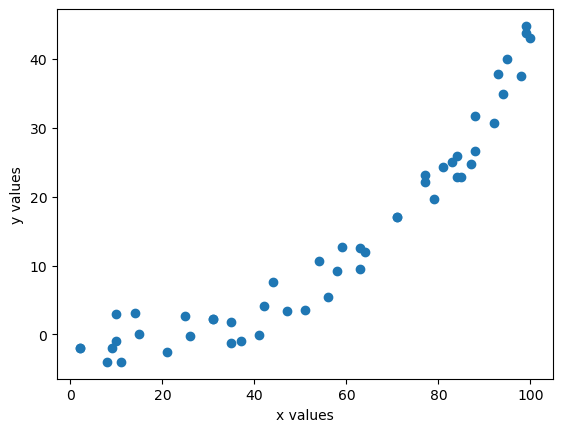

In [17]:
plt.scatter(curve.x, curve.y);
plt.xlabel("x values")
plt.ylabel("y values")

In [44]:
#imput
# degree- polynomial terms to be used in the model
def fit_poly(degree):
    # calling numpy method polyfit
    p = np.polyfit(curve.x, curve.y, deg = degree)
    curve['fit'] = np.polyval(p, curve.x)
    # draw the regression line after fitting the model
    sns.scatterplot(x=curve['x'], y=curve['y'], label='Actual Data', color='red')
    # PLot the actual x and y values
    return plt.plot(curve.x, curve.fit, label = 'fit')

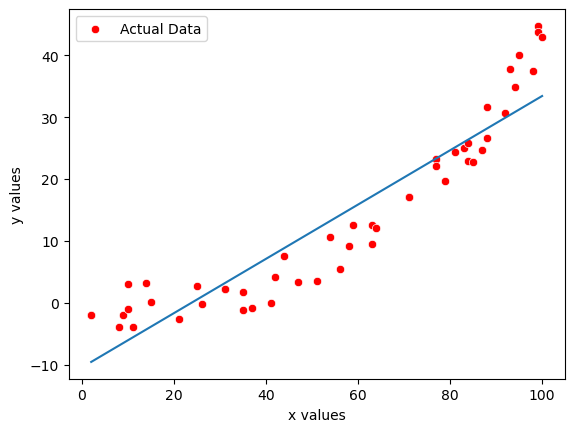

In [46]:
fit_poly(1);
# ploting the model form and the data
plt.xlabel("x values")
plt.ylabel("y values");

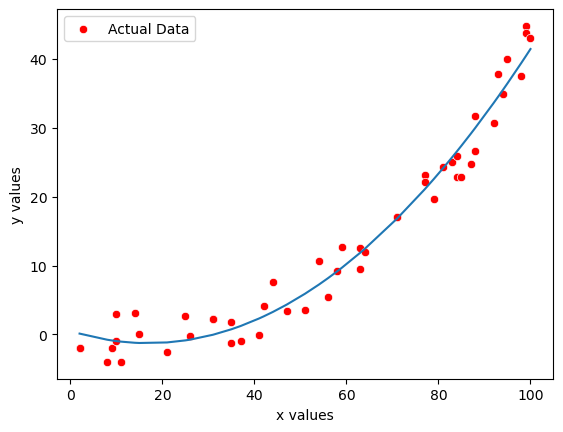

In [48]:
fit_poly(2);
plt.xlabel("x values")
plt.ylabel("y values");

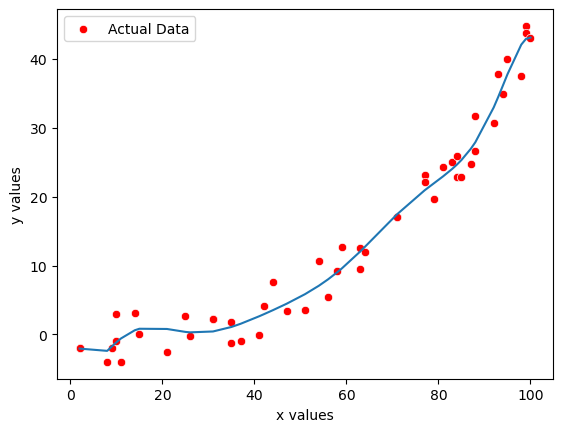

In [50]:
fit_poly(10);
plt.xlabel("x values")
plt.ylabel("y values");

In [68]:
#split the data into 60:40 training and test set
train_X, test_X, train_Y, test_Y = train_test_split(curve.x, curve.y, test_size = 0.4, random_state =100)

#define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame(columns = ["degree", "rmse_train","rmse_test"])
#define a method to return the rmse given actual and training predicted values.
def get_rmse(Y, Y_fit):
    return np.sqrt(metrics.mean_squared_error(Y, Y_fit))
# itrate from to 15
for i in range(1,15):
    #fitting model
    p = np.polyfit(train_X, train_Y, deg = i)
    # stroring model degree and rmse on train and test set
    rmse_df.loc[i-1] = [i, get_rmse(train_Y, np.polyval(p, train_X)), get_rmse(test_Y, np.polyval(p, test_X))]

In [70]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


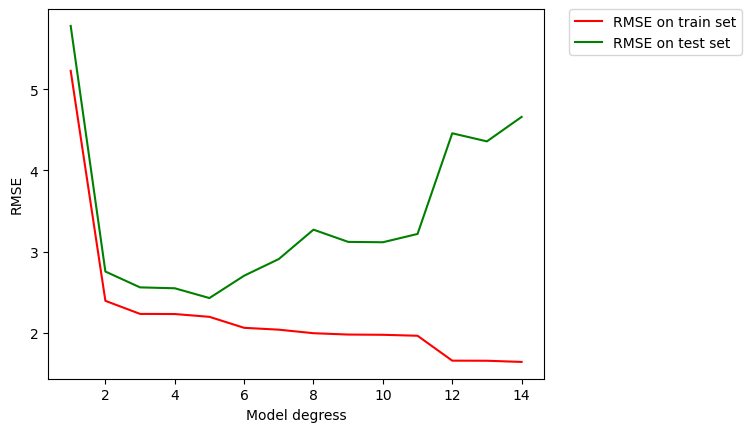

In [74]:
#ploting the rmse for training set in red color
plt.plot(rmse_df.degree, rmse_df.rmse_train, label = "RMSE on train set", color = 'r')

# ploting the rmse for test in green color
plt.plot(rmse_df.degree, rmse_df.rmse_test, label= "RMSE on test set", color= 'g')

#mention the legend
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad= 0.);
plt.xlabel("Model degress")
plt.ylabel("RMSE");
